In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as np
import  numpy as np
import os
import subprocess

In [2]:
directory = 'wGWAS/'
file_paths = [os.path.join(directory, path) for path in os.listdir(directory) if path.endswith('-snp2gene.tsv')]

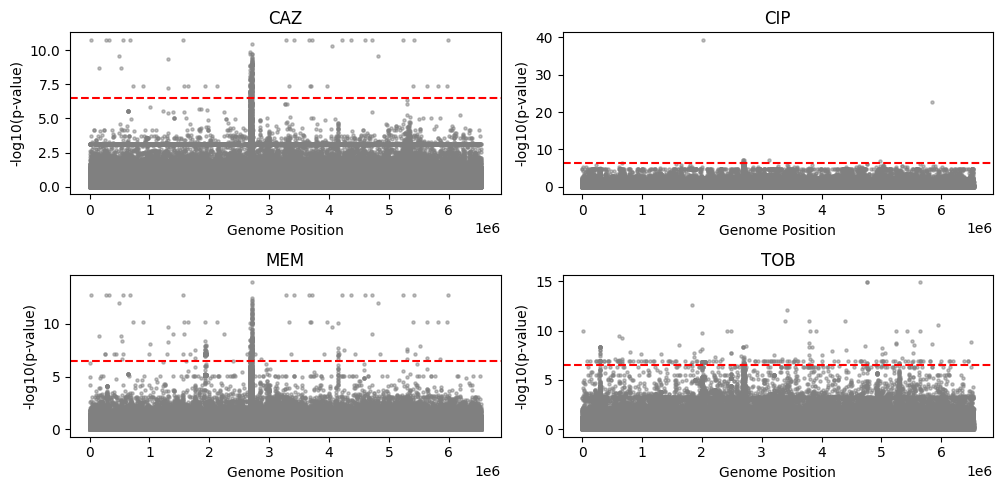

In [4]:
file_paths_sorted = sorted(file_paths, key=lambda x: os.path.basename(x).split('-')[0])

# Step 2: Load the data
list_of_dataframes = [pd.read_csv(file_path, sep='\t') for file_path in file_paths_sorted]

# Step 3: Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs = axs.flatten()

# Step 4: Plot each Manhattan plot
for df, ax, file_path in zip(list_of_dataframes, axs, file_paths_sorted):
    drug_name = os.path.basename(file_path).split('-')[0]
    pattern_name = f"{drug_name}_patterns"

    # Run threshold script and decode result
    threshold_output = subprocess.check_output([
        'python3', 'count_patterns.py',
        '--threshold', pattern_name
    ]).decode('utf-8').strip()

    # Handle cases like "Threshold: 0.0001"
    if 'Threshold:' in threshold_output:
        threshold = float(threshold_output.split('Threshold:')[-1].strip())
    else:
        threshold = float(threshold_output)

    # Plot points and threshold
    ax.scatter(df['genomic_position'], -np.log10(df['snp_pvalue']), color='grey', alpha=0.5, s=5)
    ax.axhline(-np.log10(threshold), color='red', linestyle='dashed')

    ax.set_xlabel('Genome Position')
    ax.set_ylabel('-log10(p-value)')
    ax.set_title(drug_name)

# Step 5: Clean layout
plt.tight_layout()
plt.savefig('wGWAS-manhattan_pa.png', dpi=300)
plt.show()

In [2]:
#make qq plots

drugs = ['CAZ', 'CIP', 'MEM', 'TOB']

gwas_files = []
for drug in drugs:
    file = f'{drug}.tsv'
    gwas_files.append(file)

for gwas_file in gwas_files:
    output_file = os.path.splitext(gwas_file)[0] + '_qq_plot.png'  # add file extension
    subprocess.run([
        'python3',
        '/storage/bamu/scripts/qq_plot.py',
        gwas_file,
        '--output',
        f'plots/{output_file}'
    ])
